In [5]:
%reset -f
import ROOT

%run -i eppi0_columns.py
df = ROOT.RDataFrame("h22","data/lvl2_epgg.inb.qa.root")

df = df.Define("mgg", "(ROOT::Math::PxPyPzMVector(g1x, g1y, g1z, 0)+ROOT::Math::PxPyPzMVector(g2x, g2y, g2z, 0)).M()")

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
['mgg', 'ex', 'ey', 'ez', 'px', 'py', 'pz', 'g1x', 'g1y', 'g1z', 'g2x', 'g2y', 'g2z', 'esec', 'psec', 'g1sec', 'g2sec', 'g1ecn', 'g2ecn']


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

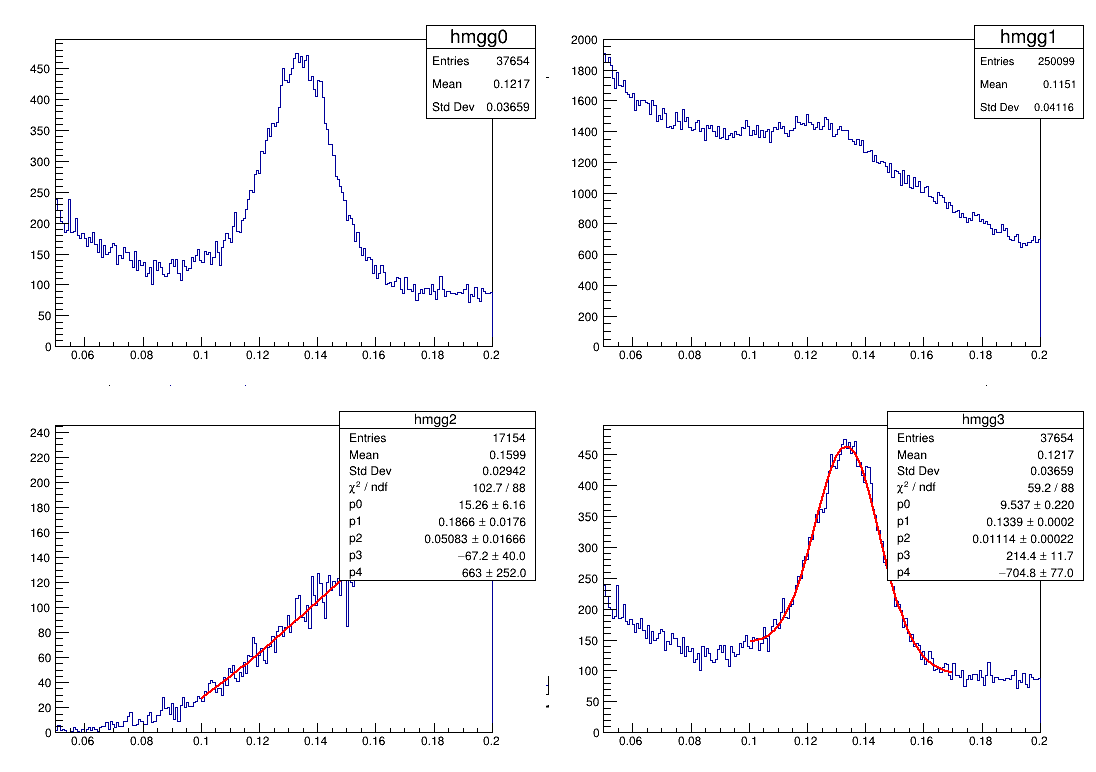

In [6]:
print(list(df.GetColumnNames()))
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()

rdf = df.Define("g1","sqrt(g1x*g1x + g1y*g1y + g1z*g1z)").Define("g2","sqrt(g2x*g2x + g2y*g2y + g2z*g2z)")
rdf = rdf.Define("dgsec","int dsec=abs(g2sec-g1sec);return dsec>3 ? 6-dsec : dsec;")

#rdf = rdf.Filter("dgsec<2")

hdgsec = rdf.Histo1D(("hdgsec","",5,0,5), "dgsec")

hg1 = rdf.Histo1D(("hg1","",200,0,2), "g1")
hg2 = rdf.Histo1D(("hg2","",200,0,2), "g2")

hg = hg1.GetValue()+hg2.GetValue()

hg2.Draw()

hmgg0 = rdf.Filter("g1>0.6 && g2>0.6").Histo1D(("hmgg0","",200,0.05,0.2), "mgg")
hmgg1 = rdf.Filter("!(g1ecn>1 || g2ecn>1)").Histo1D(("hmgg1","",200,0.05,0.2), "mgg")
hmgg2 = rdf.Filter("dgsec>1").Filter("g1>0.6 || g2>0.6").Histo1D(("hmgg2","",200,0.05,0.2), "mgg")
hmgg3 = rdf.Filter("(g1>0.6 && g2>0.6)").Histo1D(("hmgg3","",200,0.05,0.2), "mgg")

ROOT.gStyle.SetOptFit(1)

c1.Divide(2,2,0.001,0.001)
c1.cd(1)
hmgg0.Draw()
hmgg0.SetMinimum(0)
c1.cd(2)
hmgg1.Draw()
hmgg1.SetMinimum(0)
c1.cd(3)
hmgg2.Draw()
hmgg2.SetMinimum(0)
f2 = ROOT.TF1("f2","gausn(0)+pol1(3)",0.1,0.17)
f2.SetParameters(1,0.135,0.01,1,1)
hmgg2.Fit(f2,"QR")
c1.cd(4)
hmgg3.Draw()
hmgg3.SetMinimum(0)
f3 = ROOT.TF1("f3","gausn(0)+pol1(3)",0.1,0.17)
f3.SetParameters(1,0.135,0.01,1,1)
hmgg3.Fit(f3,"QR")



#hdgsec.Draw()

